In [10]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from keras import datasets
digits = datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

In [12]:
X_train = X_train/255
X_test = X_test/255

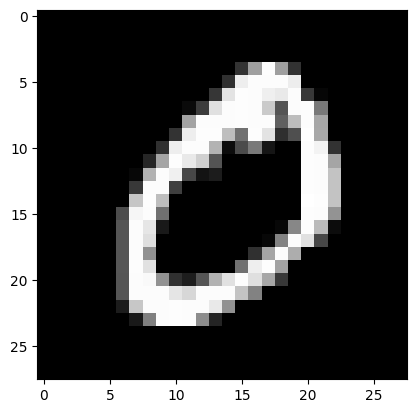

In [13]:
plt.imshow(X_train[1], cmap='gray')

In [14]:
y_train[1]

0

In [15]:
import tensorflow as tf
from keras import layers, models

model = models.Sequential()
model.add(layers.InputLayer(shape=(28, 28,1)))
model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,240 (24.38 KB)

 Trainable params: 6,240 (24.38 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy
              optimizer="adam",
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.7919 - loss: 0.6498 - val_accuracy: 0.9658 - val_loss: 0.1082


In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9607 - loss: 0.1212


[0.1082189604640007, 0.9657999873161316]

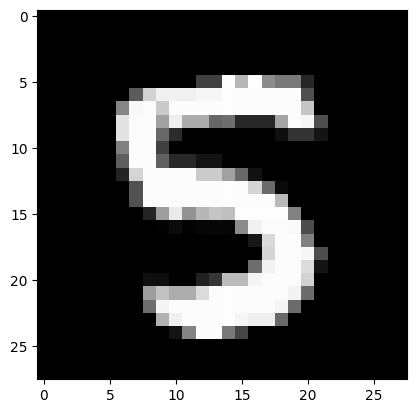

In [20]:
plt.imshow(X_test[120], cmap='gray')

In [21]:
yp = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [22]:
yp[120]

array([1.2236695e-10, 2.6576868e-07, 5.0727816e-10, 1.7101150e-04,
       8.6909180e-10, 9.9977183e-01, 1.6805508e-08, 1.2189321e-09,
       4.4515520e-05, 1.2326210e-05], dtype=float32)

In [23]:
np.argmax(yp[0])

7

In [24]:
model.save('CNN_fashion_mnist.keras')